**Non-robust Google Coab Scaffolding to load and call the vision-transformer code - needs more exit codes**

In [1]:
# setup the environment
! pip install yfinance numpy pandas matplotlib scikit-learn pyts torch einops vit-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [2]:
%matplotlib inline

In [3]:
!nvidia-smi

Thu Aug 15 01:45:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   42C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# set some variables + make sure to use GPU
root_dir = "/content/" #root dir that coalb uses
repo_git = "https://github.com/ArindamBanerji/Time-Series.git" # git repository
local_repo = "./Time-Series" # local directory base for repo
version_number = 'v32' # use a output version number
base_dir = "/content/Time-Series/ViT-TS-Forecast/" # local directory for execution
fnm = "vision_transformer_ts_forecasting.py" # nae of python file from repo
default_batch_sz = 32 # set batch size - not being used
parse_args = True # not needed but code allows simpl invocation

In [5]:
# go to the root directory - helps for the git pulls
import os
os.chdir(root_dir)

In [6]:
# idempotent git pull
! (test -d $local_repo && git -C $local_repo pull --rebase) || git clone $repo_git

Cloning into 'Time-Series'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 4), reused 26 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 165.53 KiB | 27.59 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [7]:
# change directory into the local repo
import os

cwd = os.getcwd()
if (os.path.samefile(cwd, base_dir) == False) :
    os.chdir(base_dir)

In [8]:
#basic test to make sure that the file exists - should probably exit code
! (test -f "$fnm" && echo "file-exists") || echo "file-not-exists"

file-exists


In [9]:
# Option #2: dynamic import and call the main entry point.- do arg parse
import sys
import os
import importlib
import traceback  # Import traceback for error handling
import argparse  # Import argparse for command-line argument parsing

# does the heavy lifting of the call to vision-transformer code
def invoke_ViT_TS_args (default_batch_sz, base_dir, fnm, version_num) :

    print ("batch_sz", default_batch_sz)

    # check for fike path
    file_exists = os.path.exists(os.path.join(base_dir, fnm ))


    if not file_exists:
        print(f"Error: File 'vision_transformer_ts_forecasting.py' not found in {base_dir}")
    else:
        # Append the directory to Python's search path
        sys.path.append(base_dir)
        # get the module name
        module_name = fnm.replace('.py', '')

        # Attempt to import the module directly (no relative import)
        try:
            module = importlib.import_module(module_name)

            # Define command-line arguments
            parser = argparse.ArgumentParser()
            parser.add_argument('--ticker', type=str, required=True, help='Stock ticker symbol')
            parser.add_argument('--start_date', type=str, required=True, help='Start date for data')
            parser.add_argument('--end_date', type=str, required=True, help='End date for data')
            args = parser.parse_args(['--ticker', 'AAPL', '--start_date', '2020-01-01', '--end_date', '2023-12-31'])

            # Call the main function from the imported module
            module.main(batch_size=32, version_num=version_number, args=args)

        except SystemExit as e:
            print(f"The 'main' function exited with code: {e.code}")
            # Print the traceback to see what led to the SystemExit
            traceback.print_exc()

batch_sz 32
Fetching stock data for AAPL...


[*********************100%%**********************]  1 of 1 completed


Preparing data...
Training model and making predictions...


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Fold 1, Epoch [10/300], Train Loss: 0.1198, Val Loss: 0.1631
Fold 1, Epoch [20/300], Train Loss: 0.1030, Val Loss: 0.1004
Fold 1, Epoch [30/300], Train Loss: 0.0579, Val Loss: 0.0546
Fold 1, Epoch [40/300], Train Loss: 0.0551, Val Loss: 0.0676
Fold 1, Epoch [50/300], Train Loss: 0.0452, Val Loss: 0.0461
Fold 1, Epoch [60/300], Train Loss: 0.0417, Val Loss: 0.0486
Fold 1, Epoch [70/300], Train Loss: 0.0351, Val Loss: 0.0539
Early stopping at epoch 72
Fold 2, Epoch [10/300], Train Loss: 0.1210, Val Loss: 0.1221
Fold 2, Epoch [20/300], Train Loss: 0.1177, Val Loss: 0.1221
Fold 2, Epoch [30/300], Train Loss: 0.0747, Val Loss: 0.0627
Fold 2, Epoch [40/300], Train Loss: 0.0502, Val Loss: 0.0498
Fold 2, Epoch [50/300], Train Loss: 0.0715, Val Loss: 0.0566
Fold 2, Epoch [60/300], Train Loss: 0.0423, Val Loss: 0.0403
Fold 2, Epoch [70/300], Train Loss: 0.0429, Val Loss: 0.0395
Fold 2, Epoch [80/300], Train Loss: 0.0390, Val Loss: 0.0431
Fold 2, Epoch [90/300], Train Loss: 0.0321, Val Loss: 0.04

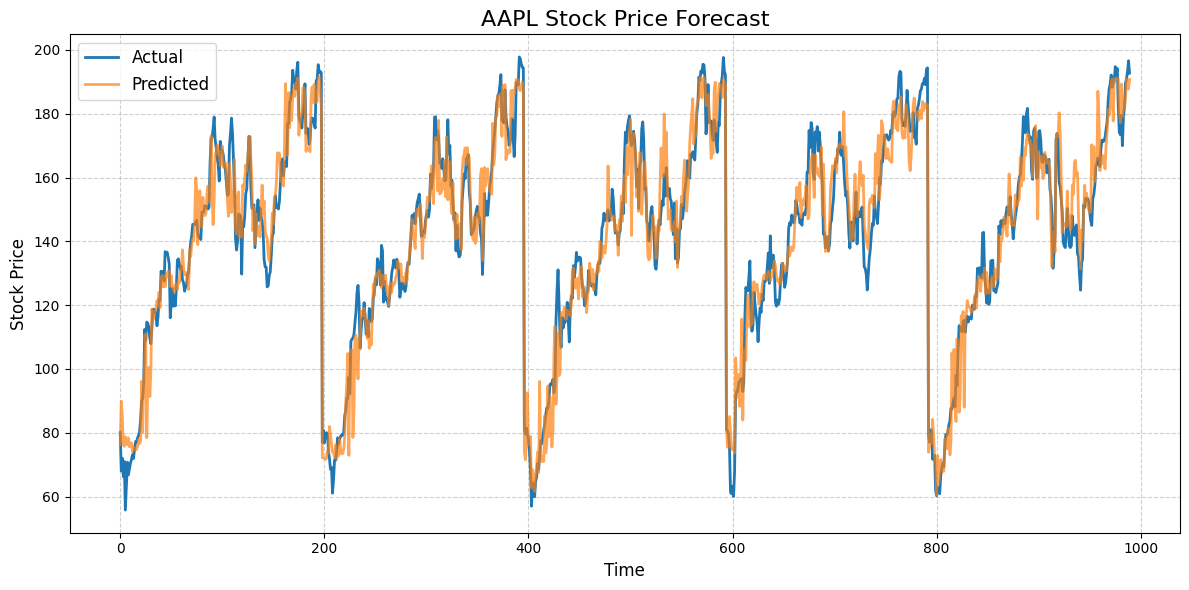

Metrics saved to 'metrics/v32_AAPL_2020-01-01_2023-12-31_metrics.csv'
Generating summary...

Stock Price Forecast Summary for AAPL
Version: v32
Period: 2020-01-01 to 2023-12-31

Evaluation Metrics:
MSE:  75.4857
RMSE: 8.6882
MAE:  6.6180
R2:   0.9288
MAPE: 5.0581%

Key Insights:
- Model explains 92.88% of the variance in stock price.
- Average prediction error: $8.69 (RMSE)
- Predictions are off by an average of 5.06% (MAPE)

Note: Please refer to the generated plot and metrics file for more details.

Summary saved as 'summaries/v32_AAPL_2020-01-01_2023-12-31_summary.txt'
Forecast complete. Results, metrics, and summary saved.


In [10]:
# based on th parse_arg flag - do the call.
if parse_args :
      invoke_ViT_TS_args (default_batch_sz, base_dir, fnm, version_number)